In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_read=pd.read_csv(city_data_to_load)
ride_data_read=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_data=pd.merge(ride_data_read,city_data_read, on="city", how="left")
#^ utilized how=left because iy joins all matching rows from columns to the left 

# Display the data table for preview
merged_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
#Key Variables total determine for plotting 
# Average fare per City 
city_fare=merged_data.groupby("city")["fare"].mean()

# Total number of rides per city 
city_rides=merged_data.groupby("city")["ride_id"].count()

# Total number of drivers per city 
city_drivers=merged_data.groupby("city")["driver_count"].first()

# City Types
city_type=merged_data.groupby("city")["type"].first()

city_summary=pd.DataFrame({"Fare per City":city_fare,
                           "Riders per City": city_rides,
                          "Drivers per City": city_drivers, 
                          "Type of City":city_type})
city_summary.head()

,Fare per City,Riders per City,Drivers per City,Type of City
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

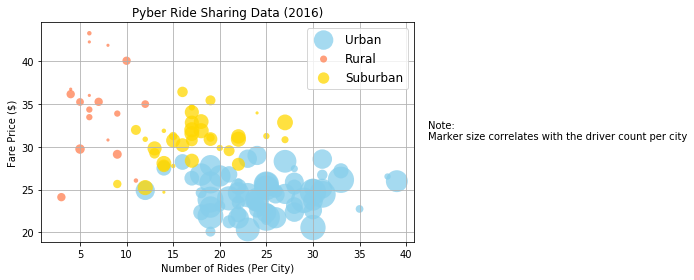

In [44]:
# Obtain the x and y coordinates for each of the three city types
pyber_df=city_summary.groupby("Type of City")

pyber_urban=pyber_df.get_group("Urban")

pyber_rural=pyber_df.get_group("Rural")

pyber_suburban=pyber_df.get_group("Suburban")

# Build the scatter plots for each city types
#Plotting of data based on the urban rows
urban_plt = plt.scatter(x=pyber_urban["Riders per City"], 
                        y= pyber_urban["Fare per City"], 
                        s=pyber_urban["Drivers per City"]*10, 
                        color="SkyBlue", 
                        edgecolor = "none", 
                        alpha = .75, 
                        label = "Urban" )

#Plotting of data based on the rural rows
rural_plt = plt.scatter(x=pyber_rural["Riders per City"], 
                        y= pyber_rural["Fare per City"], 
                        s=pyber_rural["Drivers per City"]*10, 
                        color="Coral", 
                        edgecolor = "none", 
                        alpha = .75, 
                        label = "Rural" )
#Plotting of data based on the suburban rows
suburban_plt = plt.scatter(x=pyber_suburban["Riders per City"], 
                        y= pyber_suburban["Fare per City"], 
                        s=pyber_suburban["Drivers per City"]*10, 
                        color="Gold", 
                        edgecolor = "none", 
                        alpha = .75, 
                        label = "Suburban" )

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Number of Rides (Per City)")
plt.ylabel("Fare Price ($)")
plt.grid() #background grid
plt.tight_layout() #fitted 


# Create a legend
plt.legend(loc="best", fontsize=12)

# Incorporate a text label regarding circle size
# ^s in plotting code is for size
#plt.figure(figsize=(5,5)) <<WxL parameters 
                                          
plt.figtext(x=1, y=.5, s="Note: \nMarker size correlates with the driver count per city")

# Save Figure

plt.savefig("../Images/pyberhw_plot.png",bbox_inches="tight")

In [42]:
# Show plot
plt.show()

## Total Fares by City Type

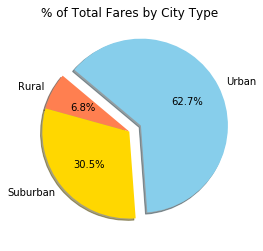

In [40]:
# Calculate Type Percents of total fare by City 
# %=type/total
#Total_fare=pyber_df.apply["Fare per City"].sum()
#Total_fare=pyber_df["Fare per City"].sum() #sums up per type of city 
Total_fare=merged_data["fare"].sum() #sums all of the fares

#if use groupedby sets to get the sum of the fares of the type of the cities from above its a different #
Total_fare_type=merged_data.groupby("type")["fare"].sum()

#percentages of fares by type of cities
Percent_fare_types=(Total_fare_type/Total_fare)*100

# Build Pie Chart
labels=["Rural", "Suburban","Urban"]
sizes= Percent_fare_types
colors=["Coral","Gold","SkyBlue"]
explode=(0,0,0.15)

fare_plt= plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
                 autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/pyberhw_Fares_piechart.png",bbox_inches="tight")

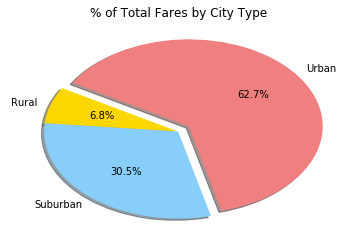

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents


# Build Pie Chart

# Save Figure


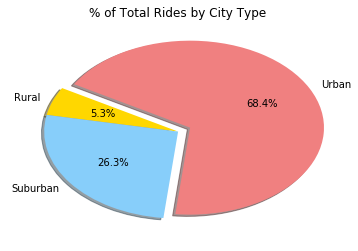

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


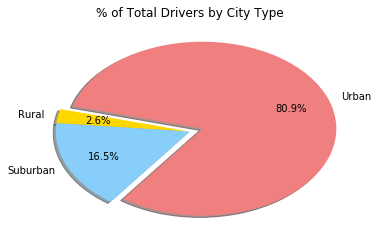

In [6]:
# Show Figure
plt.show()